In [ ]:
from pyniryo2 import *
import pyniryo

hotspot_mode = "10.10.10.10"
wifi_mode = "192.168.0.140"

# -- MUST Change these variables
simulation_mode = True
if simulation_mode:
    robot_ip_address, workspace_name = "172.16.196.129", "gazebo_1"
else:
    robot_ip_address, workspace_name = wifi_mode, "cps_praktikum"


# -- Can Change these variables
grid_dimension = (3, 3)  # conditioning grid dimension
vision_process_on_robot = False  # boolean to indicate if the image processing happens on the Robot
display_stream = True  # Only used if vision on computer

# -- Should Change these variables
# The pose from where the image processing happens
observation_pose = PoseObject(
    x=0.17, y=0., z=0.35,
    roll=0.0, pitch=1.57, yaw=0.0,
)

# Center of the conditioning area
center_conditioning_pose = PoseObject(
    x=0.0, y=-0.25, z=0.12,
    roll=-0., pitch=1.57, yaw=-1.57
)

top_left = PoseObject(
    x=0.3, y=0.045, z=0.08,
    roll=-0.142, pitch=1.57, yaw=0.
)
top_right = PoseObject(
    x=0.3, y=-0.045, z=0.08,
    roll=-0.142, pitch=1.5, yaw=0.
)

In [ ]:
robot = NiryoRobot(robot_ip_address)

if (not simulation_mode):
    # Calibrate robot if robot needs calibration
    robot.arm.calibrate_auto()
    
    # Equip tool
    robot.tool.update_tool()


In [33]:
robot.arm.move_pose(observation_pose)

In [27]:
img_compressed = robot.vision.get_img_compressed()
camera_info = robot.vision.get_camera_intrinsics()
img = pyniryo.uncompress_image(img_compressed)
img = pyniryo.undistort_image(img, camera_info.intrinsics, camera_info.distortion)

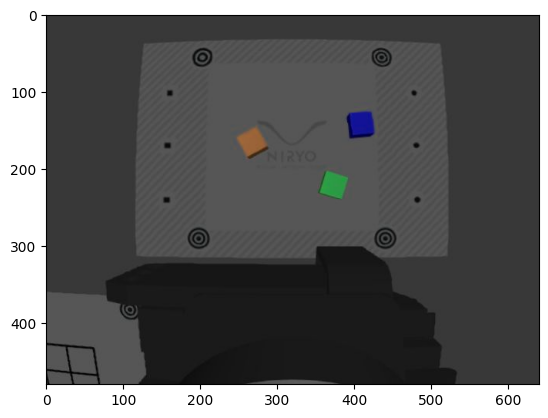

In [28]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

In [18]:
#!python -m pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 5.0 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.5 MB/s eta 0:00:00


In [29]:
target_pose = robot.vision.get_target_pose_from_rel(workspace_name, 10, 0, 0, 0)

x = 0.3370, y = 0.0870, z = 10.0860
roll = -0.000, pitch = 1.571, yaw = 0.000

In [38]:
robot.arm.move_pose(top_left)

In [82]:
robot.arm.move_pose(top_right)

In [78]:
robot.arm.move_pose(PoseObject(
    x=0.33, y=-0.07, z=0.1,
    roll=-0.142, pitch=1.57, yaw=0.
))

## x from 0.17 to 0.33
## y -0.07 to 0.07
## z 0.1

In [80]:
data= [(53, 35), (53, 36), (53, 37), (53, 38), (53, 39), (53, 40), (53, 41), (53, 42), (53, 43), (53, 44), (53, 45), (54, 35), (55, 35), (56, 35), (57, 35), (58, 35), (59, 35), (60, 35), (61, 35), (62, 35), (62, 36), (62, 37), (62, 38), (62, 39), (62, 40), (62, 41), (62, 42), (62, 43), (62, 44), (62, 45), (62, 46), (62, 47), (62, 48), (62, 49), (62, 50), (62, 51), (62, 52), (62, 53), (62, 54), (62, 55), (62, 56), (62, 57), (62, 58), (62, 59), (62, 60), (62, 61), (62, 62), (62, 63), (62, 64), (62, 65), (62, 66), (62, 67), (62, 68), (62, 69), (63, 69), (64, 69), (65, 69), (65, 116), (65, 117), (65, 118), (65, 119), (65, 120), (65, 121), (65, 122), (65, 123), (65, 124), (65, 125), (65, 126), (65, 127), (65, 128), (65, 129), (65, 130), (65, 131), (65, 132), (65, 133), (65, 134), (65, 135), (65, 136), (65, 137), (65, 138), (65, 139), (65, 140), (65, 141), (65, 142), (65, 143), (65, 144), (65, 145), (65, 146), (65, 147), (66, 69), (66, 115), (66, 116), (66, 147), (67, 69), (67, 114), (67, 115), (67, 147), (68, 69), (68, 114), (68, 147), (69, 69), (69, 114), (69, 147), (69, 148), (70, 69), (70, 114), (70, 148), (71, 69), (71, 114), (71, 148), (72, 69), (72, 114), (72, 148), (73, 69), (73, 114), (73, 148), (74, 69), (74, 114), (74, 148), (75, 69), (75, 114), (75, 148), (76, 69), (76, 114), (76, 148), (77, 69), (77, 114), (77, 148), (78, 69), (78, 114), (78, 148), (79, 69), (79, 114), (79, 148), (80, 69), (80, 114), (80, 148), (81, 69), (81, 114), (81, 148), (81, 149), (81, 150), (81, 151), (81, 152), (81, 153), (81, 154), (81, 155), (81, 156), (81, 157), (81, 158), (81, 159), (81, 160), (81, 161), (81, 162), (81, 163), (81, 164), (81, 165), (81, 166), (81, 167), (81, 168), (81, 169), (81, 170), (81, 171), (82, 69), (82, 70), (82, 114), (82, 171), (83, 70), (83, 71), (83, 72), (83, 73), (83, 74), (83, 75), (83, 76), (83, 77), (83, 78), (83, 79), (83, 80), (83, 81), (83, 82), (83, 83), (83, 84), (83, 85), (83, 86), (83, 87), (83, 88), (83, 89), (83, 90), (83, 91), (83, 92), (83, 93), (83, 94), (83, 95), (83, 96), (83, 97), (83, 98), (83, 99), (83, 100), (83, 101), (83, 102), (83, 103), (83, 104), (83, 105), (83, 106), (83, 107), (83, 108), (83, 109), (83, 110), (83, 111), (83, 112), (83, 113), (83, 114), (83, 171), (84, 171), (85, 171), (86, 171), (87, 171), (88, 171), (89, 171), (90, 171), (91, 171), (92, 171), (92, 172), (93, 172), (94, 172), (95, 172), (96, 172), (97, 172), (98, 172), (99, 172), (100, 172), (101, 172), (102, 172), (102, 173), (103, 173), (104, 173), (105, 173), (106, 173), (107, 173), (108, 173), (109, 173), (110, 173), (111, 173), (112, 173), (113, 173), (114, 173), (115, 173), (116, 173), (117, 173), (118, 173), (119, 173), (120, 173), (121, 173), (122, 173), (123, 173), (124, 173), (124, 174), (125, 174), (125, 175), (125, 176), (125, 177), (125, 178), (125, 179), (125, 180), (125, 181), (125, 182), (125, 183), (125, 184), (125, 185), (125, 186), (125, 187), (125, 188), (125, 189), (125, 190), (125, 191), (125, 192), (125, 193), (125, 194), (125, 195), (125, 196), (125, 197), (125, 198), (125, 199), (125, 200), (125, 201), (125, 202), (125, 203), (126, 203), (127, 203), (128, 203), (129, 203), (130, 203), (131, 203), (132, 203), (133, 203), (134, 203), (135, 203), (136, 203), (137, 203), (138, 203), (139, 203), (140, 203), (141, 203), (142, 203), (143, 203), (144, 203), (145, 203), (146, 203), (147, 203), (148, 203), (149, 203), (150, 203), (151, 203), (152, 203), (153, 203), (154, 203), (155, 203), (156, 203), (157, 203), (158, 203), (159, 202), (159, 203), (160, 178), (160, 179), (160, 180), (160, 181), (160, 182), (160, 183), (160, 184), (160, 185), (160, 186), (160, 187), (160, 188), (160, 189), (160, 190), (160, 191), (160, 192), (160, 193), (160, 194), (160, 195), (160, 196), (160, 197), (160, 198), (160, 199), (160, 200), (160, 201), (160, 202), (161, 176), (161, 177), (161, 178), (162, 176), (163, 176), (164, 176), (165, 176), (166, 176), (167, 176), (168, 176), (169, 176), (170, 176), (171, 176), (172, 176), (172, 177), (172, 178), (172, 179), (172, 180), (172, 181), (172, 182), (172, 183), (172, 184), (172, 185), (172, 186), (172, 187), (172, 188), (172, 189), (172, 190), (172, 191), (172, 192), (172, 193), (172, 194), (172, 195), (172, 196), (172, 197), (172, 198), (172, 199), (172, 200), (172, 201), (172, 202), (172, 203), (172, 204), (172, 205), (172, 206), (172, 207), (172, 208), (172, 209), (172, 210), (172, 211), (172, 212), (172, 213), (172, 214), (172, 215), (172, 216), (172, 217), (172, 218), (172, 219), (172, 220), (172, 221), (172, 222), (172, 223), (172, 224), (172, 225), (172, 226), (172, 227), (172, 228), (172, 229), (173, 229), (174, 229), (175, 229)]
shape = (243, 258)

In [83]:
import numpy as np
def map_to_new_coordinate_system(coord, x_range=(0.17, 0.33), y_range=(-0.07, 0.07)):
    # Normalize the coordinates
    normalized_coord = (coord[0] / 243, coord[1] / 258)

    # Map to the new coordinate system
    mapped_coord = (normalized_coord[0] * (x_range[1] - x_range[0]) + x_range[0],
                    normalized_coord[1] * (y_range[1] - y_range[0]) + y_range[0])

    return mapped_coord


In [87]:
test = map_to_new_coordinate_system((175, 229))

In [88]:
test

(0.2852263374485597, 0.05426356589147288)

In [89]:
robot.arm.move_pose(PoseObject(
    x=test[0], y=test[1], z=0.1,
    roll=-0.142, pitch=1.57, yaw=0.
))

In [98]:
def get_unique_tuples(data):
    # Initialize the result list with the first tuple
    result = [data[0]]

    # Iterate over the rest of the tuples
    for i in range(1, len(data)):
        # If both values in the current tuple are different from the previous one
        if data[i][0] != result[-1][0] and data[i][1] != result[-1][1]:
            # Add the current tuple to the result list
            result.append(data[i])

    return result

In [99]:
waypoints = get_unique_tuples(data)

In [100]:
waypoints

[(53, 35),
 (62, 36),
 (63, 69),
 (65, 116),
 (66, 69),
 (67, 114),
 (68, 69),
 (69, 114),
 (70, 69),
 (71, 114),
 (72, 69),
 (73, 114),
 (74, 69),
 (75, 114),
 (76, 69),
 (77, 114),
 (78, 69),
 (79, 114),
 (80, 69),
 (81, 114),
 (82, 69),
 (83, 70),
 (84, 171),
 (92, 172),
 (102, 173),
 (124, 174),
 (125, 175),
 (126, 203),
 (159, 202),
 (160, 178),
 (161, 176),
 (172, 177),
 (173, 229)]

In [101]:
mapped_waypoints = [map_to_new_coordinate_system(waypoint) for waypoint in waypoints]

In [102]:
mapped_waypoints

[(0.2048971193415638, -0.0510077519379845),
 (0.21082304526748974, -0.05046511627906977),
 (0.2114814814814815, -0.03255813953488373),
 (0.21279835390946503, -0.007054263565891464),
 (0.2134567901234568, -0.03255813953488373),
 (0.21411522633744856, -0.008139534883720927),
 (0.21477366255144034, -0.03255813953488373),
 (0.21543209876543212, -0.008139534883720927),
 (0.21609053497942388, -0.03255813953488373),
 (0.21674897119341566, -0.008139534883720927),
 (0.2174074074074074, -0.03255813953488373),
 (0.2180658436213992, -0.008139534883720927),
 (0.21872427983539094, -0.03255813953488373),
 (0.21938271604938273, -0.008139534883720927),
 (0.2200411522633745, -0.03255813953488373),
 (0.22069958847736626, -0.008139534883720927),
 (0.22135802469135804, -0.03255813953488373),
 (0.22201646090534982, -0.008139534883720927),
 (0.22267489711934157, -0.03255813953488373),
 (0.22333333333333333, -0.008139534883720927),
 (0.2239917695473251, -0.03255813953488373),
 (0.2246502057613169, -0.03201550

In [103]:
for waypoint in mapped_waypoints:
    robot.arm.move_pose(PoseObject(
        x=waypoint[0], y=waypoint[1], z=0.1,
        roll=-0.142, pitch=1.57, yaw=0.
    ))
    